Problem Statement
WHO is a specialized agency of the UN which is concerned with the world population health. Based upon the various parameters, WHO allocates budget for various areas to conduct various campaigns/initiatives to improve healthcare. Annual salary is an important variable which is considered to decide budget to be allocated for an area.

We have a data which contains information about 32561 samples and 15 continuous and categorical variables. Extraction of data was done from 1994 Census dataset.

The goal here is to build a binary model to predict whether the salary is >50K or not.

1.1. Data Dictionary

age: age
workclass: workclass
education: highest education
marrital status: marital status
occupation: occupation
sex: sex
capital gain: income from investment sources other than salary/wages
capital loss: income from investment sources other than salary/wages
working hours: nummber of working hours per week
salary: salary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [2]:
adult_data=pd.read_excel('D:/Ment Class/Practise11/Excel Data/TSF/PowerBI/DWNLDS/CV/MRA Project/MRA Project/XLSX File for practice/adult_data.xlsx')

In [3]:
adult_data.head()

,age,workclass,education,marrital status,occupation,sex,capital gain,capital loss,working hours per week,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Male,0,0,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Male,0,0,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Male,0,0,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Female,0,0,40,<=50K


In [4]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   education               32561 non-null  object
 3   marrital status         32561 non-null  object
 4   occupation              32561 non-null  object
 5   sex                     32561 non-null  object
 6   capital gain            32561 non-null  int64 
 7   capital loss            32561 non-null  int64 
 8   working hours per week  32561 non-null  int64 
 9   salary                  32561 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
dups = adult_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(adult_data.shape)

Number of duplicate rows = 5864
(32561, 10)


In [6]:
adult_data.drop_duplicates(inplace=True) 

In [7]:
dups = adult_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(adult_data.shape)

Number of duplicate rows = 0
(26697, 10)


In [8]:
for feature in adult_data.columns: 
    if adult_data[feature].dtype == 'object': 
        print(feature)
        print(adult_data[feature].value_counts())
        print('\n')
        

workclass
Private             17474
Self-emp-not-inc     2447
Local-gov            1980
?                    1519
State-gov            1246
Self-emp-inc         1089
Federal-gov           921
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


education
HS-grad         7815
Some-college    5692
Bachelors       4461
Masters         1606
Assoc-voc       1281
Assoc-acdm      1036
11th             987
10th             820
7th-8th          611
Prof-school      562
9th              502
Doctorate        399
12th             397
5th-6th          315
1st-4th          164
Preschool         49
Name: education, dtype: int64


marrital status
Married-civ-spouse       12679
Never-married             7698
Divorced                  3930
Separated                  978
Widowed                    971
Married-spouse-absent      418
Married-AF-spouse           23
Name: marrital status, dtype: int64


occupation
Prof-specialty       3703
Exec-managerial      3531
Sales       

In [9]:
# Replace ? to new Unk category
adult_data.workclass=adult_data.workclass.str.replace('?', 'Unk')
adult_data.occupation = adult_data.occupation.str.replace('?', 'Unk')

C:\Users\vasan\AppData\Local\Temp\ipykernel_9856\487895187.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adult_data.workclass=adult_data.workclass.str.replace('?', 'Unk')
C:\Users\vasan\AppData\Local\Temp\ipykernel_9856\487895187.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adult_data.occupation = adult_data.occupation.str.replace('?', 'Unk')


In [10]:
adult_data.describe()

,age,capital gain,capital loss,working hours per week
count,26697.000000,26697.000000,26697.000000,26697.000000
mean,39.987489,1304.600929,105.699330,40.852530
std,13.691269,8111.031099,441.214823,13.114255
min,17.000000,0.000000,0.000000,1.000000
25%,29.000000,0.000000,0.000000,38.000000
50%,39.000000,0.000000,0.000000,40.000000
75%,49.000000,0.000000,0.000000,46.000000
max,90.000000,99999.000000,4356.000000,99.000000


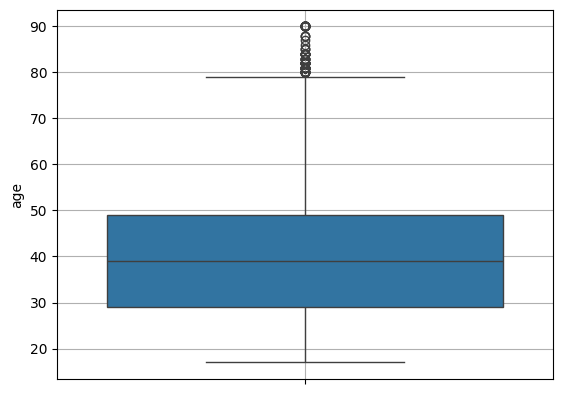

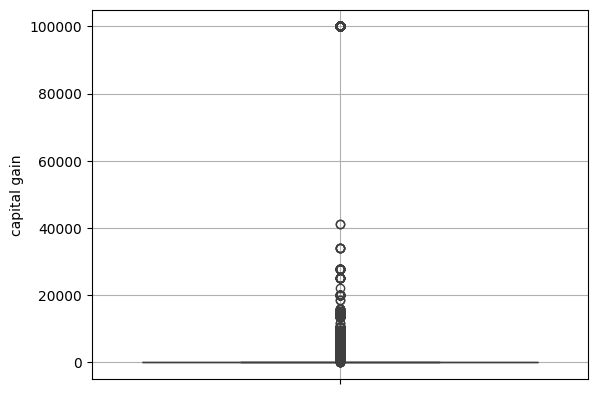

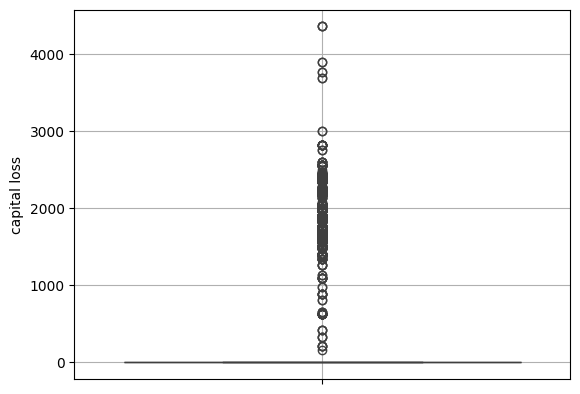

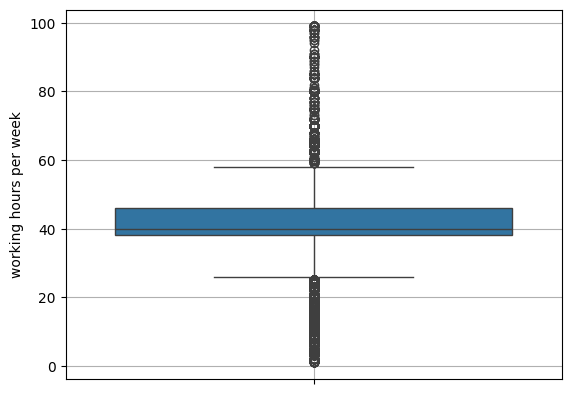

In [11]:
cols = ['age','capital gain','capital loss','working hours per week']
for i in cols:
    sns.boxplot(adult_data[i],whis=1.5)
    plt.grid()
    plt.show();

In [12]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [13]:
lr,ur=remove_outlier(adult_data['working hours per week'])
print('Lower Range :',lr,'\nUpper Range :',ur)
adult_data['working hours per week']=np.where(adult_data['working hours per week']>ur,ur,adult_data['working hours per week'])
adult_data['working hours per week']=np.where(adult_data['working hours per week']<lr,lr,adult_data['working hours per week'])

Lower Range : 26.0 
Upper Range : 58.0


In [14]:
## This is a loop to treat outliers for all the non-'object' type varible

# for column in adult_data.columns:
#     if adult_data[column].dtype != 'object': 
#         lr,ur=remove_outlier(adult_data[column])
#         adult_data[column]=np.where(adult_data[column]>ur,ur,adult_data[column])
#         adult_data[column]=np.where(adult_data[column]<lr,lr,adult_data[column])

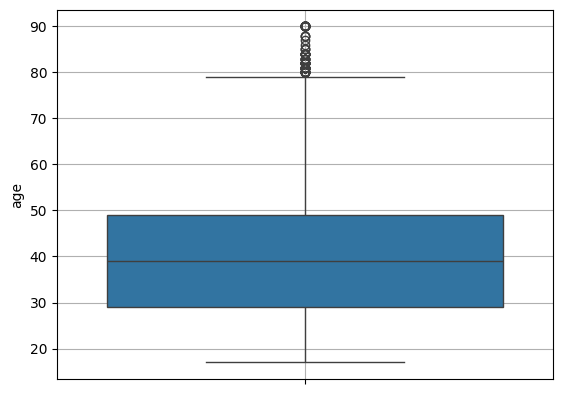

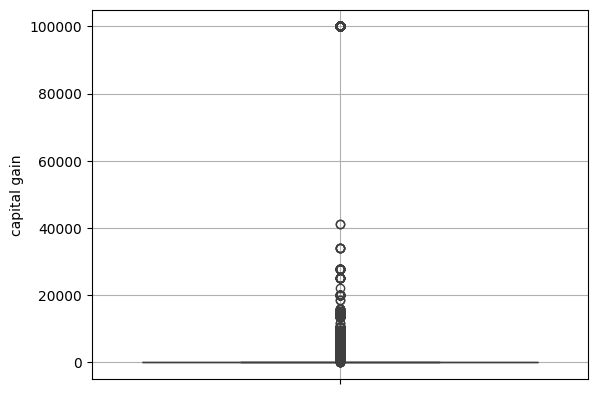

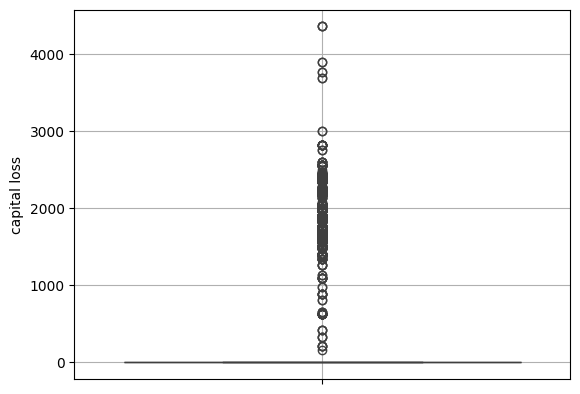

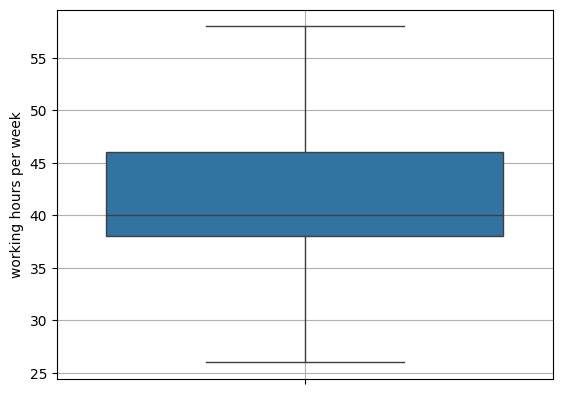

In [15]:
cols = ['age','capital gain','capital loss','working hours per week']
for i in cols:
    sns.boxplot(adult_data[i],whis=1.5)
    plt.grid()
    plt.show();

In [16]:
adult_data.corr()

C:\Users\vasan\AppData\Local\Temp\ipykernel_9856\335520086.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  adult_data.corr()


,age,capital gain,capital loss,working hours per week
age,1.000000,0.068974,0.039005,0.037001
capital gain,0.068974,1.000000,-0.038534,0.085196
capital loss,0.039005,-0.038534,1.000000,0.055047
working hours per week,0.037001,0.085196,0.055047,1.000000


C:\Users\vasan\AppData\Local\Temp\ipykernel_9856\2583852379.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(adult_data.corr(), annot=True,mask=np.triu(adult_data.corr(),+1));


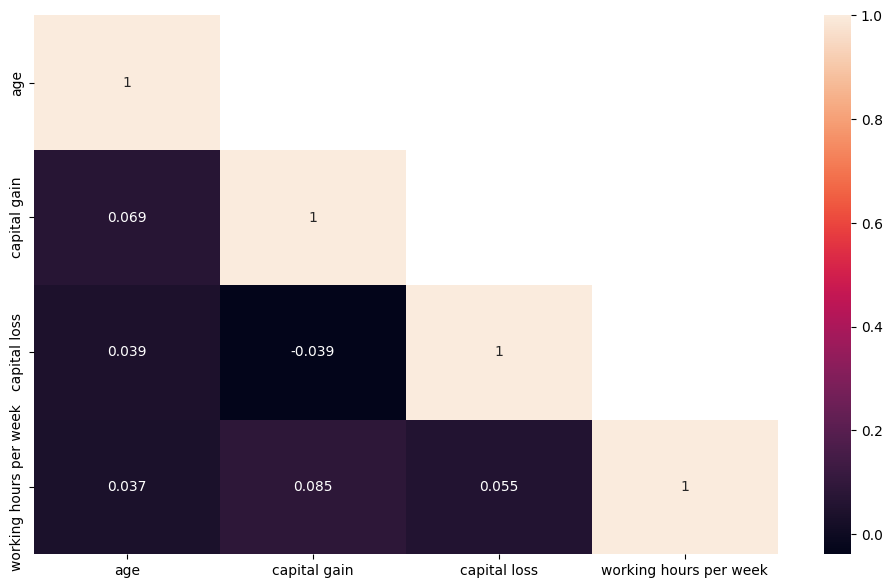

In [17]:
plt.figure(figsize=(12,7))
sns.heatmap(adult_data.corr(), annot=True,mask=np.triu(adult_data.corr(),+1));

In [18]:
adult_data.describe()

,age,capital gain,capital loss,working hours per week
count,26697.000000,26697.000000,26697.000000,26697.000000
mean,39.987489,1304.600929,105.699330,41.169682
std,13.691269,8111.031099,441.214823,9.029725
min,17.000000,0.000000,0.000000,26.000000
25%,29.000000,0.000000,0.000000,38.000000
50%,39.000000,0.000000,0.000000,40.000000
75%,49.000000,0.000000,0.000000,46.000000
max,90.000000,99999.000000,4356.000000,58.000000


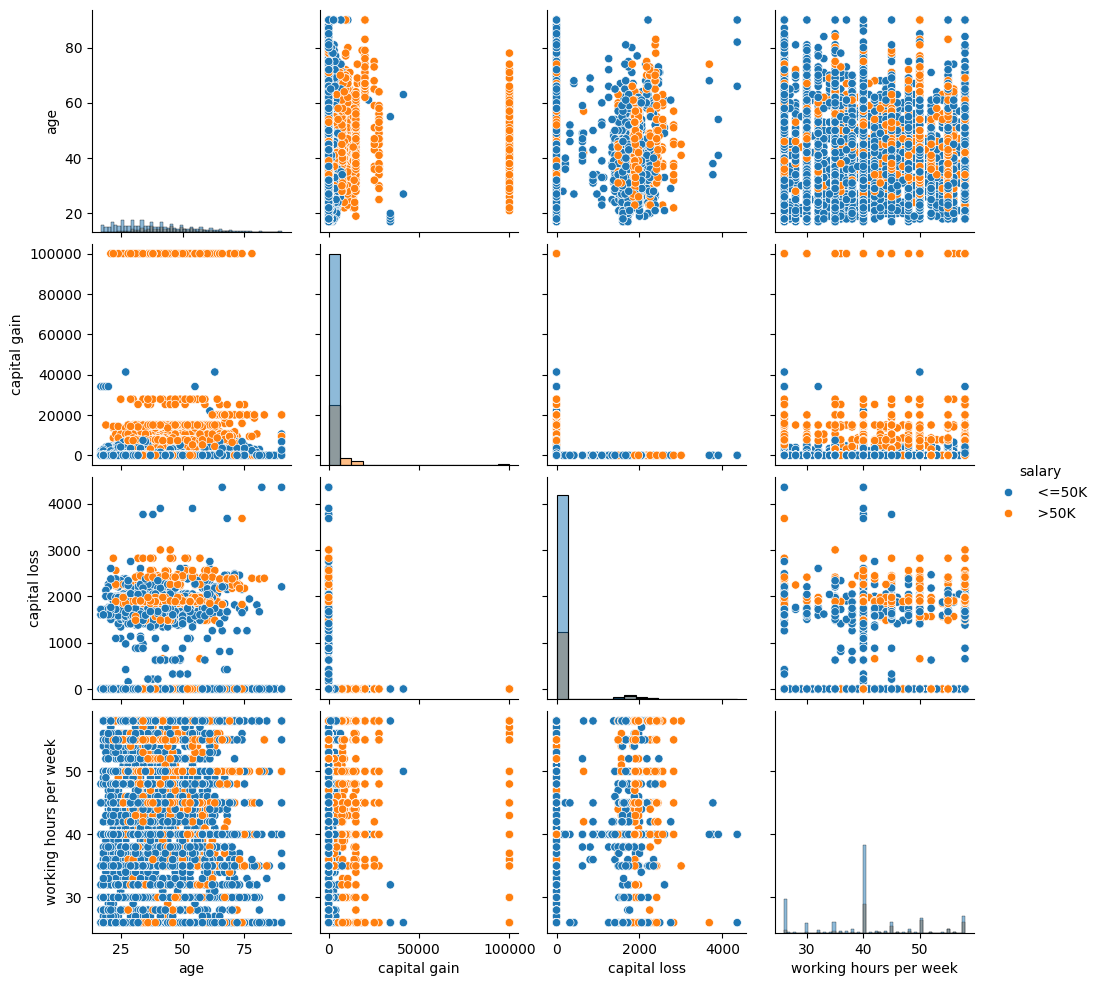

In [19]:
sns.pairplot(adult_data ,diag_kind='hist' ,hue='salary');

In [20]:
## We are coding up the 'education' variable in an ordinal manner

adult_data['education']=np.where(adult_data['education'] =='Preschool', '1', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='1st-4th', '2', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='5th-6th', '3', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='7th-8th', '4', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='9th', '5', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='10th', '6', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='11th', '7', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='12th', '8', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='HS-grad', '9', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Prof-school', '9', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Assoc-acdm', '10', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Assoc-voc', '11', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Some-college', '12', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Bachelors', '13', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Masters', '14', adult_data['education'])
adult_data['education']=np.where(adult_data['education'] =='Doctorate', '15', adult_data['education'])

In [21]:
## We are grouping certain types of 'workclass' under different categories

adult_data['workclass']=np.where(adult_data['workclass'] =='Federal-gov', 'Government', adult_data['workclass'])
adult_data['workclass']=np.where(adult_data['workclass'] =='Local-gov', 'Government', adult_data['workclass'])
adult_data['workclass']=np.where(adult_data['workclass'] =='State-gov', 'Government', adult_data['workclass'])

adult_data['workclass']=np.where(adult_data['workclass'] =='Self-emp-inc', 'Others', adult_data['workclass'])
adult_data['workclass']=np.where(adult_data['workclass'] =='Self-emp-not-inc', 'Others', adult_data['workclass'])
adult_data['workclass']=np.where(adult_data['workclass'] =='unknown', 'Others', adult_data['workclass'])
adult_data['workclass']=np.where(adult_data['workclass'] =='Without-pay', 'Others', adult_data['workclass'])
adult_data['workclass']=np.where(adult_data['workclass'] =='Never-worked', 'Others', adult_data['workclass'])

In [22]:
## We are grouping certain types of 'marritalstatus' under different categories

adult_data['marrital status']=np.where(adult_data['marrital status'] =='Divorced', 'CurrentlySingle', adult_data['marrital status'])
adult_data['marrital status']=np.where(adult_data['marrital status'] =='Separated', 'CurrentlySingle', adult_data['marrital status'])
adult_data['marrital status']=np.where(adult_data['marrital status'] =='Never-married', 'CurrentlySingle', adult_data['marrital status'])
adult_data['marrital status']=np.where(adult_data['marrital status'] =='Widowed', 'CurrentlySingle', adult_data['marrital status'])

adult_data['marrital status']=np.where(adult_data['marrital status'] =='Married-civ-spouse', 'Married', adult_data['marrital status'])
adult_data['marrital status']=np.where(adult_data['marrital status'] =='Married-spouse-absent', 'Married', adult_data['marrital status'])
adult_data['marrital status']=np.where(adult_data['marrital status'] =='Married-AF-absent', 'Married', adult_data['marrital status'])
adult_data['marrital status']=np.where(adult_data['marrital status'] =='Married-AF-spouse', 'Married', adult_data['marrital status'])

In [23]:
## We are grouping certain types of 'occupation' under different categories

adult_data['occupation']=np.where(adult_data['occupation'] =='Adm-clerical', 'WhiteCollar', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Exec-managerial', 'WhiteCollar', adult_data['occupation'])

adult_data['occupation']=np.where(adult_data['occupation'] =='Craft-repair', 'BlueCollar', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Handlers-cleaners', 'BlueCollar', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Transport-moving', 'BlueCollar', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Farming-fishing', 'BlueCollar', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Machine-op-inspct', 'BlueCollar', adult_data['occupation'])

adult_data['occupation']=np.where(adult_data['occupation'] =='Tech-support', 'Service', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Other-service', 'Service', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Protective-serv', 'Service', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Priv-house-serv', 'Service', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Prof-specialty', 'Service', adult_data['occupation'])

adult_data['occupation']=np.where(adult_data['occupation'] =='unknown', 'Unknown_Others', adult_data['occupation'])
adult_data['occupation']=np.where(adult_data['occupation'] =='Armed-Forces', 'Unknown_Others', adult_data['occupation'])

In [24]:
adult_data.head()

,age,workclass,education,marrital status,occupation,sex,capital gain,capital loss,working hours per week,salary
0,39,Government,13,CurrentlySingle,WhiteCollar,Male,2174,0,40.0,<=50K
1,50,Others,13,Married,WhiteCollar,Male,0,0,26.0,<=50K
2,38,Private,9,CurrentlySingle,BlueCollar,Male,0,0,40.0,<=50K
3,53,Private,7,Married,BlueCollar,Male,0,0,40.0,<=50K
4,28,Private,13,Married,Service,Female,0,0,40.0,<=50K


In [25]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26697 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     26697 non-null  int64  
 1   workclass               26697 non-null  object 
 2   education               26697 non-null  object 
 3   marrital status         26697 non-null  object 
 4   occupation              26697 non-null  object 
 5   sex                     26697 non-null  object 
 6   capital gain            26697 non-null  int64  
 7   capital loss            26697 non-null  int64  
 8   working hours per week  26697 non-null  float64
 9   salary                  26697 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.2+ MB


In [26]:
## Converting the education variable to numeric

adult_data['education'] = adult_data['education'].astype('int64')
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26697 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     26697 non-null  int64  
 1   workclass               26697 non-null  object 
 2   education               26697 non-null  int64  
 3   marrital status         26697 non-null  object 
 4   occupation              26697 non-null  object 
 5   sex                     26697 non-null  object 
 6   capital gain            26697 non-null  int64  
 7   capital loss            26697 non-null  int64  
 8   working hours per week  26697 non-null  float64
 9   salary                  26697 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.2+ MB


In [27]:
adult_data['salary'].value_counts()

 <=50K    19673
 >50K      7024
Name: salary, dtype: int64

In [28]:
adult_data['salary'] = adult_data['salary'].replace({' <=50K':0,' >50K':1})
adult_data['salary'].value_counts()

0    19673
1     7024
Name: salary, dtype: int64

In [29]:
adult_data.head()

,age,workclass,education,marrital status,occupation,sex,capital gain,capital loss,working hours per week,salary
0,39,Government,13,CurrentlySingle,WhiteCollar,Male,2174,0,40.0,0
1,50,Others,13,Married,WhiteCollar,Male,0,0,26.0,0
2,38,Private,9,CurrentlySingle,BlueCollar,Male,0,0,40.0,0
3,53,Private,7,Married,BlueCollar,Male,0,0,40.0,0
4,28,Private,13,Married,Service,Female,0,0,40.0,0


In [30]:
## Converting the other 'object' type variables as dummy variables

adult_data_dummy = pd.get_dummies(adult_data,drop_first=True)
adult_data_dummy.head()

,age,education,capital gain,capital loss,working hours per week,salary,workclass_Others,workclass_Private,workclass_Unk,marrital status_Married,occupation_Sales,occupation_Service,occupation_Unk,occupation_Unknown_Others,occupation_WhiteCollar,sex_Male
0,39,13,2174,0,40.0,0,0,0,0,0,0,0,0,0,1,1
1,50,13,0,0,26.0,0,1,0,0,1,0,0,0,0,1,1
2,38,9,0,0,40.0,0,0,1,0,0,0,0,0,0,0,1
3,53,7,0,0,40.0,0,0,1,0,1,0,0,0,0,0,1
4,28,13,0,0,40.0,0,0,1,0,1,0,1,0,0,0,0


In [31]:
# Copy all the predictor variables into X dataframe
X = adult_data_dummy.drop('salary', axis=1)

# Copy target into the y dataframe. 
y = adult_data_dummy['salary']

In [32]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=adult_data_dummy['salary'])

In [33]:
y_train.value_counts(1)

0    0.736876
1    0.263124
Name: salary, dtype: float64

In [34]:
y_test.value_counts(1)

0    0.736954
1    0.263046
Name: salary, dtype: float64

Logistic Regression Model
We are making some adjustments to the parameters in the Logistic Regression Class to get a better accuracy. Details of which can be found out on the site scikit-learn mentioned below

scikit-learn

Argument=solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’ Algorithm to use in the optimization problem.

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

‘liblinear’ and ‘saga’ also handle L1 penalty

‘saga’ also supports ‘elasticnet’ penalty

‘liblinear’ does not support setting penalty='none'

Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

New in version 0.17: Stochastic Average Gradient descent solver.

New in version 0.19: SAGA solver.

Changed in version 0.22: The default solver changed from ‘liblinear’ to ‘lbfgs’ in 0.22.

Article on Solvers

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate example data (replace with your actual data loading/preparation)
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Logistic Regression model without regularization (penalty=None)
model = LogisticRegression(
    solver='newton-cg',  # Optimization algorithm (Newton's method)
    max_iter=10000,       # Maximum number of iterations for convergence
    penalty=None,         # No regularization
    verbose=1,            # Set to 1 for moderate verbosity
    n_jobs=2              # Number of CPU cores to use (-1 to use all cores)
)

# Fit the model to the training data
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(max_iter=10000, n_jobs=2, penalty=None, solver='newton-cg',
                   verbose=1)

In [59]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [60]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.781406,0.218594
1,0.030544,0.969456
2,0.644405,0.355595
3,0.071364,0.928636
4,0.977164,0.022836


In [61]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.87125

AUC: 0.940


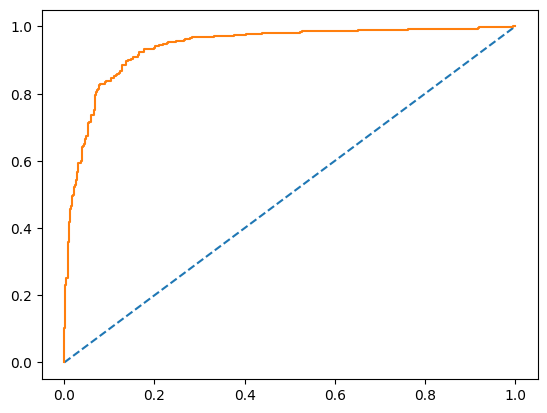

In [62]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.940


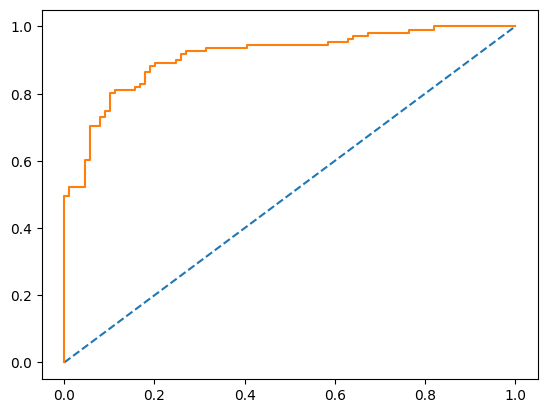

In [63]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [64]:
confusion_matrix(y_train, ytrain_predict)

array([[365,  47],
       [ 56, 332]], dtype=int64)

In [65]:
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[365,  47],
       [ 56, 332]], dtype=int64)

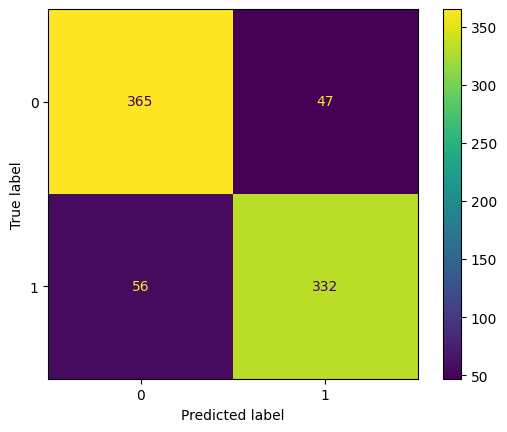

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [67]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       412
           1       0.88      0.86      0.87       388

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



In [68]:
confusion_matrix(y_test, ytest_predict)

array([[74, 15],
       [20, 91]], dtype=int64)

In [69]:
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[74, 15],
       [20, 91]], dtype=int64)

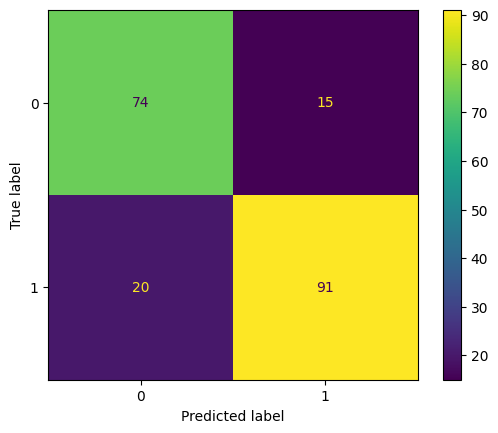

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [71]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        89
           1       0.86      0.82      0.84       111

    accuracy                           0.82       200
   macro avg       0.82      0.83      0.82       200
weighted avg       0.83      0.82      0.83       200



In [72]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [73]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [74]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [75]:
grid_search.fit(X_train, y_train)

D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\Users\vasan\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Users\vasan\anaconda3\Lib\site-packages\s

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [76]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [77]:
best_model = grid_search.best_estimator_

In [78]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [79]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.778621,0.221379
1,0.031910,0.968090
2,0.642158,0.357842
3,0.074737,0.925263
4,0.975411,0.024589


In [80]:
## Confusion matrix on the training data
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[365,  47],
       [ 57, 331]], dtype=int64)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       412
           1       0.88      0.85      0.86       388

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800
 



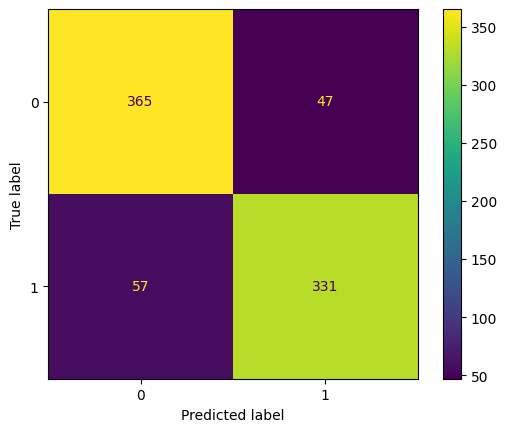

In [81]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200
 



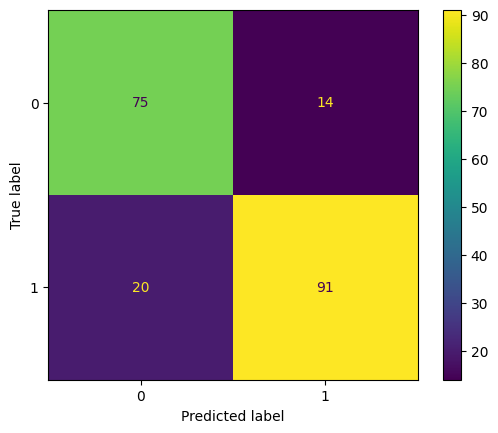

In [82]:
## Confusion matrix on the test data
cm = confusion_matrix(y_test, ytest_predict)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_test, ytest_predict),'\n');

In [83]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, ytest_predict).ravel()